# PoS tagging using HMMs and the Viterbi algorithm

This notebook serves as a showcase of the PoS tagger implemented using Viterbi's algorithm. 

In [1]:
from HMM import HMM

import numpy as np
import seaborn as sns
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

## First predictions in Basque and Spanish

Let's start by making our first predictions with examples in Basque and Spanish, the two languages that were chosen for this exercise. For both cases, the same procedure is followed. We first declare an object of the HMM class with a given name (we use this variable to distinguish languages). Then, we load the .conllu file with the training data, and train the model in the corresponding language. Afterwards, we can make predictions. Each prediction returns two values, the obtained tags after applying Viterbi, and the logarithmic probability of this prediction.

### Predictions in Basque

In [2]:
basque_hmm = HMM("EUS")

print("Training the model: ", basque_hmm.name)
basque_hmm.train("UD_Basque-BDT/eu_bdt-ud-train.conllu")

basque_sentence = "Nire etxea oso handia da"
print("Tagging the sentence: ", basque_sentence)
basque_tags, basque_log_prob = basque_hmm.pos_tagging(basque_sentence)
print("POS: ", basque_tags)
print("Log probability: ", basque_log_prob)

Training the model:  EUS
Tagging the sentence:  Nire etxea oso handia da
POS:  [('nire', 'PRON'), ('etxea', 'NOUN'), ('oso', 'ADV'), ('handia', 'ADJ'), ('da', 'AUX')]
Log probability:  -20.0


### Predictions in Spanish

In [3]:
spanish_hmm = HMM("ESP")

print("Training the model: ", spanish_hmm.name)
spanish_hmm.train("./UD_Spanish-AnCora/es_ancora-ud-train.conllu")

spanish_sentence = "El gato Juan vive aqui"
print("Tagging the sentence: ", spanish_sentence)
spanish_tags, spanish_log_prob, = spanish_hmm.pos_tagging(spanish_sentence)
print("POS: ", spanish_tags)
print("Log probability: ", spanish_log_prob)

Training the model:  ESP
Tagging the sentence:  El gato Juan vive aqui
POS:  [('el', 'DET'), ('gato', 'NOUN'), ('juan', 'PROPN'), ('vive', 'VERB'), ('aqui', 'NOUN')]
Log probability:  -16.0


## Testing the Viterbi algorithm

To train the HMMs, we are using a train split of the Universal Dependencies dataset. A test split can also be used to see how accurate are our models. We have implemented a test function to output several interesting metrics.

In [14]:
print("Testing the model: ", spanish_hmm.name)
test_scores = spanish_hmm.test("./UD_Spanish-AnCora/es_ancora-ud-dev.conllu")

for metric, value in test_scores.items():
    print(f"{metric}: {value}")

print("---------------------")

print("Testing the model: ", basque_hmm.name)
test_scores = basque_hmm.test("./UD_Basque-BDT/eu_bdt-ud-dev.conllu")

for metric, value in test_scores.items():
    print(f"{metric}: {value}")

Testing the model:  ESP Smoothing factor=0
Accuracy: 0.40991535671100365
Recall: 0.9177177622792699
Micro-averaged F1 score: 0.9449558806677109
Macro-averaged F1 score: 0.6338176712145135
---------------------
Testing the model:  EUS Smoothing factor=0
Accuracy: 0.21245828698553948
Recall: 0.7873895826987511
Micro-averaged F1 score: 0.8664804469273744
Macro-averaged F1 score: 0.5780686721526983


The metrics that we have decided to output are accuracy, recall, micro-averaged F1 score and macro-averaged F1 score. They give the following information:

- **Accuracy** refers to the proportion of correctly predicted instances out of all instances in a dataset. It gives a general idea of how well a machine learning model performs on a particular task. However, accuracy alone cannot provide insights into specific aspects of model performance, such as precision and recall.

- **Recall** measures how many actual positive cases are correctly identified from all possible positive cases. It answers questions like "Of all the instances that should have been predicted as positive, how many were actually predicted correctly?" High recall means fewer false negatives.

- **Micro-averaged F1 Score** calculates the F1 score for every label separately and then computes the unweighted average across labels. It disregards sample sizes and treats all classes equally when computing metrics. A good micro F1 score indicates high precision and recall for all classes.

- **Macro-averaged F1 Score**  score takes into account the sample size of each class while calculating the F1 score. It assigns higher weights to classes with larger samples and vice versa. The macro F1 score represents the F1 score after down-weighting the minority class. A good macro F1 score implies that the model works well for major classes.

For the Spanish model, the recall and the micro-averaged F1 score is really high, indicating that there are fewer false negatives and high overall precision and recall for all clases. This, in combination with the relatively low macro-averaged F1 score, could indicate that the model may be overfitting to the majority class, leading to poor performance on the minority classes. A high micro averaged F1 score indicates that the model is performing well on an individual class level. However, a low macro averaged F1 score suggests that the model isn't performing well across all classes. This could be due to class imbalance issues, which is likely as some word classes are more frequent than others. As a result, the micro F1 score, which takes into account each class individually, appears high, while the macro F1 score, which gives a weighted average of all classes, appears low. For the Basque language, we have a similar situation, but with lower scores. However, the same scenario is present: high recall and micro-averaged F1 score, low macro-averaged and accuracy.

If we compare both language models, we can see that Basque HMM get worse scores than the Spanish one. We suppose that this is caused by the characteristics of the language itself. In Basque, suffixes are very commonly used to create words and verbs, for example, "*friend*" and "the *friend*" are "*lagun*" and "*laguna*", the determiner is a suffix insted of being a separated word.

With a HMM that takes into accounts words with all the additional morphemes, "*lagun*" and "*lagunak*" are completely different words, however, in Spanish "*amigo*" and "el *amigo*" are processed as the same word. In Basque, a lot of words are out of the vocabulary because they do not appear often enough, and so they are not added to the vocabulary, making this language more complicated for a model to take into account all the possible suffixes that a word can have (lagun, laguna, lagunak, lagunek, lagunekin...). To calculate better PoS tags in languages like Basque, the lemma, subwords tokens and morphemes must be analysed, instead of just counting words.

## Interpreting Viterbi algorithm graphically

The Viterbi algorithm is a dynamic programming algorithm used to find the most likely state sequence of a HMM given a sequence of observation. It works by computing the probability of each state at each time step and then using these probabilities to compute the probability of the entire state sequence. The algorithm maintains a matrix of probabilities, where each row represents a state at a particular time step and each column represents a state at the previous time step. We can graphically see this matrix, and understand the decision process of the HMM.

Training the model:  EUS


<Axes: >

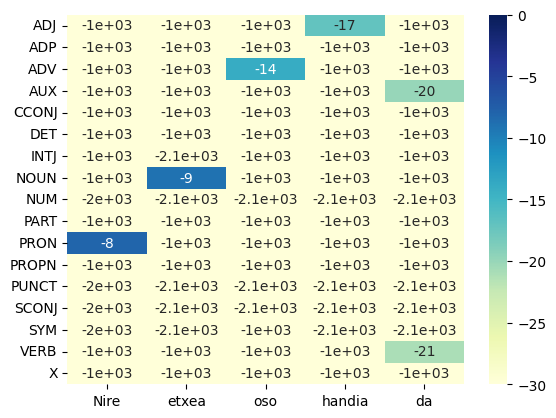

In [5]:
basque_hmm = HMM("EUS")

print("Training the model: ", basque_hmm.name)
basque_hmm.train("UD_Basque-BDT/eu_bdt-ud-train.conllu")

basque_sentence = "Nire etxea oso handia da"
viterbi = basque_hmm.pos_get_viterbi(basque_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=basque_sentence.split(), index=basque_hmm.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

Training the model:  ESP


<Axes: >

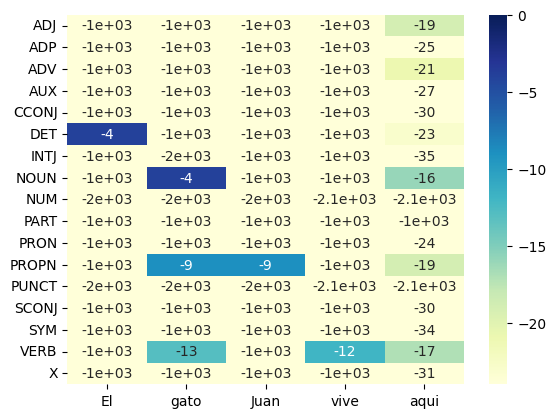

In [6]:
spanish_hmm = HMM("ESP")

print("Training the model: ", spanish_hmm.name)
spanish_hmm.train("./UD_Spanish-AnCora/es_ancora-ud-train.conllu")

spanish_sentence = "El gato Juan vive aqui"
viterbi = spanish_hmm.pos_get_viterbi(spanish_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=spanish_sentence.split(), index=spanish_hmm.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

## Trying different smoothing factors

By implementing a smoothing factor in the algorithm, we give a minimum appeareance to the rare transitions, which can help to avoid the problem of dividing by zero when computing probabilities. Let's see if our results change.

### Smoothing factors in Spanish

In [7]:
spanish_hmm = HMM("ESP Smoothing factor=0")

print("Training the model: ", spanish_hmm.name)
spanish_hmm.train("./UD_Spanish-AnCora/es_ancora-ud-train.conllu")

spanish_hmm_JeffreyPerk = HMM("ESP Smoothing factor=0.5", smooth_value=0.5)

print("Training the model: ", spanish_hmm_JeffreyPerk.name)
spanish_hmm_JeffreyPerk.train("./UD_Spanish-AnCora/es_ancora-ud-train.conllu")

spanish_hmm_Laplace = HMM("ESP Smoothing factor=1", smooth_value=1)

print("Training the model: ", spanish_hmm_Laplace.name)
spanish_hmm_Laplace.train("./UD_Spanish-AnCora/es_ancora-ud-train.conllu")

spanish_models = [spanish_hmm, spanish_hmm_JeffreyPerk, spanish_hmm_Laplace]

Training the model:  ESP Smoothing factor=0
Training the model:  ESP Smoothing factor=0.5
Training the model:  ESP Smoothing factor=1


In [8]:
for model in spanish_models:
    print("Testing the model: ", model.name)
    test_scores = model.test("./UD_Spanish-AnCora/es_ancora-ud-dev.conllu")

    for metric, value in test_scores.items():
        print(f"{metric}: {value}")
    
    print("----------------------")


Testing the model:  ESP Smoothing factor=0
Accuracy: 0.40991535671100365
Recall: 0.9177177622792699
Micro-averaged F1 score: 0.9449558806677109
Macro-averaged F1 score: 0.6338176712145135
----------------------
Testing the model:  ESP Smoothing factor=0.5
Accuracy: 0.45949214026602175
Recall: 0.9286244249888708
Micro-averaged F1 score: 0.9517870722433459
Macro-averaged F1 score: 0.609447677576209
----------------------
Testing the model:  ESP Smoothing factor=1
Accuracy: 0.33252720677146314
Recall: 0.8967947766730969
Micro-averaged F1 score: 0.9330348527538694
Macro-averaged F1 score: 0.5880189198582906
----------------------


Testing the model:  ESP Smoothing factor=0


<Axes: >

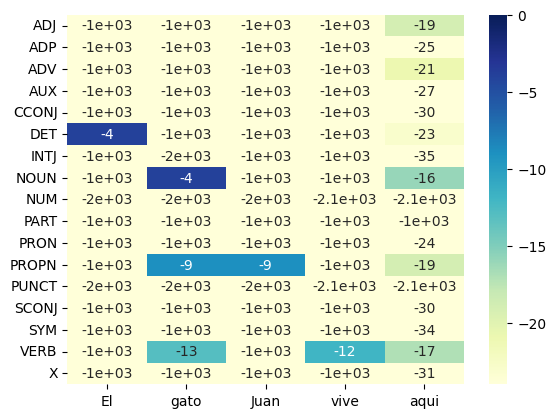

In [9]:
spanish_sentence = "El gato Juan vive aqui"

model = spanish_models[0]
print("Testing the model: ", model.name)
viterbi = model.pos_get_viterbi(spanish_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=spanish_sentence.split(), index=model.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

Testing the model:  ESP Smoothing factor=0.5


<Axes: >

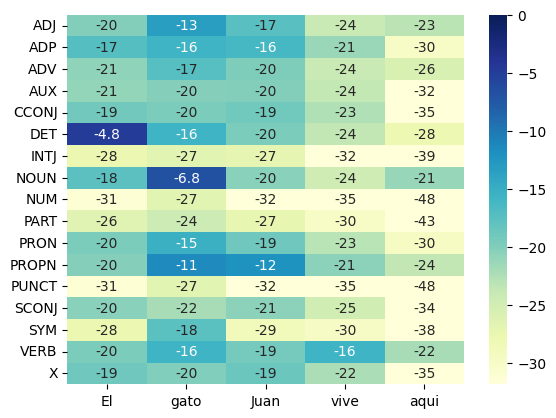

In [10]:
spanish_sentence = "El gato Juan vive aqui"

model = spanish_models[1]
print("Testing the model: ", model.name)
viterbi = model.pos_get_viterbi(spanish_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=spanish_sentence.split(), index=model.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

Testing the model:  ESP Smoothing factor=1


<Axes: >

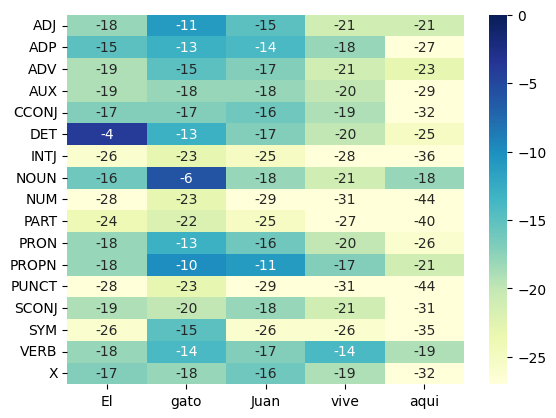

In [11]:
spanish_sentence = "El gato Juan vive aqui"

model = spanish_models[2]
print("Testing the model: ", model.name)
viterbi = model.pos_get_viterbi(spanish_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=spanish_sentence.split(), index=model.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

### Smoothing factors in Basque

In [12]:
basque_hmm = HMM("EUS Smoothing factor=0")

print("Training the model: ", basque_hmm.name)
basque_hmm.train("./UD_Basque-BDT/eu_bdt-ud-train.conllu")

basque_hmm_JeffreyPerk = HMM("EUS Smoothing factor=0.5", smooth_value=0.5)

print("Training the model: ", basque_hmm_JeffreyPerk.name)
basque_hmm_JeffreyPerk.train("./UD_Basque-BDT/eu_bdt-ud-train.conllu")

basque_hmm_Laplace = HMM("EUS Smoothing factor=1", smooth_value=1)

print("Training the model: ", basque_hmm_Laplace.name)
basque_hmm_Laplace.train("./UD_Basque-BDT/eu_bdt-ud-train.conllu")

basque_models = [basque_hmm, basque_hmm_JeffreyPerk, basque_hmm_Laplace]

Training the model:  EUS Smoothing factor=0
Training the model:  EUS Smoothing factor=0.5
Training the model:  EUS Smoothing factor=1


In [13]:
for model in basque_models:
    print("Testing the model: ", model.name)
    test_scores = model.test("./UD_Basque-BDT/eu_bdt-ud-dev.conllu")

    for metric, value in test_scores.items():
        print(f"{metric}: {value}")
    
    print("----------------------")

Testing the model:  EUS Smoothing factor=0
Accuracy: 0.21245828698553948
Recall: 0.7873895826987511
Micro-averaged F1 score: 0.8664804469273744
Macro-averaged F1 score: 0.5780686721526983
----------------------
Testing the model:  EUS Smoothing factor=0.5
Accuracy: 0.19799777530589543
Recall: 0.7761194029850746
Micro-averaged F1 score: 0.860229574611749
Macro-averaged F1 score: 0.5444540709124457
----------------------
Testing the model:  EUS Smoothing factor=1
Accuracy: 0.1807563959955506
Recall: 0.7652553558736928
Micro-averaged F1 score: 0.8524089572494911
Macro-averaged F1 score: 0.5231977826321238
----------------------


Testing the model:  EUS Smoothing factor=0


<Axes: >

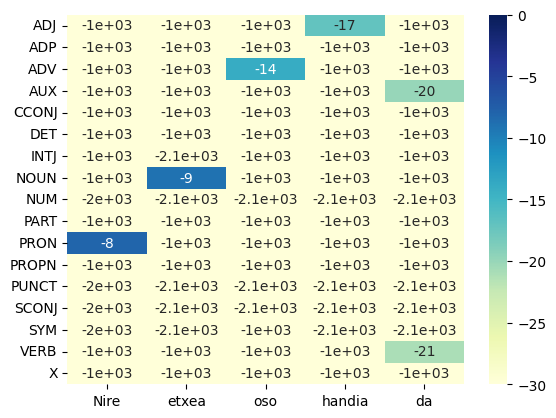

In [15]:
basque_sentence = "Nire etxea oso handia da"

model = basque_models[0]
print("Testing the model: ", model.name)
viterbi = model.pos_get_viterbi(basque_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=basque_sentence.split(), index=model.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

Testing the model:  EUS Smoothing factor=0.5


<Axes: >

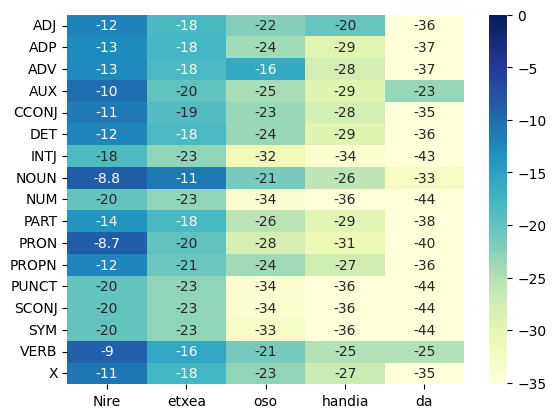

In [16]:
basque_sentence = "Nire etxea oso handia da"

model = basque_models[1]
print("Testing the model: ", model.name)
viterbi = model.pos_get_viterbi(basque_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=basque_sentence.split(), index=model.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

Testing the model:  EUS Smoothing factor=1


<Axes: >

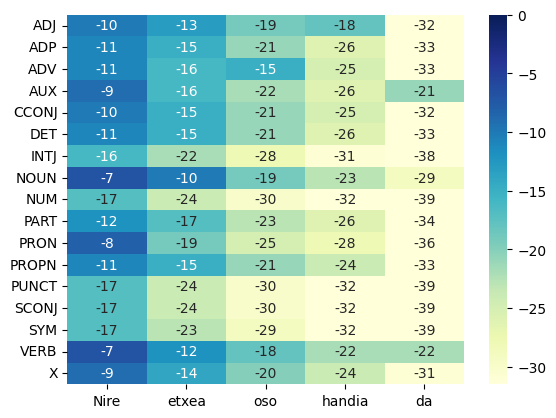

In [17]:
basque_sentence = "Nire etxea oso handia da"

model = basque_models[2]
print("Testing the model: ", model.name)
viterbi = model.pos_get_viterbi(basque_sentence)
max_value = np.max(viterbi[:, -1])

df = pd.DataFrame(viterbi, columns=basque_sentence.split(), index=model.tags)
sns.heatmap(df, annot=True, cmap="YlGnBu", vmin=max_value*1.5, vmax=0)

### Conclussions on Smoothing

After doing some experiments over the two languages, comparing the standard models, and models with an smoothing factor of 0.5 (Jeffrey Perk's Law) and 1 (Laplace's smoothing), we can draw the following conclusions:

- Overall scores suffer minor changes.
- In the Spanish case, Jefrrey Perk's law improves the model by 0.01 on micro-averaged F1 Score.
- For Basque, the best-performing model is still the standard model. 
- Analysing the heatmaps, we can see how smoothing works, avoiding probabilities of minus infinite and giving more changes to less frequent classes to be chosen. 